In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("data/prices.csv")

In [3]:
df.head()

,Ticker,2025-09-19,2025-09-20,2025-09-21,2025-09-22,2025-09-23,2025-09-24,2025-09-25,2025-09-26,2025-09-27,...,2025-12-08,2025-12-09,2025-12-10,2025-12-11,2025-12-12,2025-12-13,2025-12-14,2025-12-15,2025-12-16,2025-12-17
0,BTC,-0.010214,-0.000248,-0.018376,-0.007503,-0.000689,-0.008251,-0.021607,0.003288,-0.002738,...,-0.015377,0.029655,-0.024442,0.023155,-0.023089,-0.000984,-0.006993,-0.039389,0.006678,-0.001818
1,ETH,-0.013839,0.000045,-0.061140,-0.004545,-0.003297,-0.035501,-0.025331,0.024905,-0.002244,...,-0.007272,0.069427,-0.033591,0.010759,-0.048659,0.007490,0.002530,-0.062654,0.002152,-0.001226
2,USDT,0.000123,0.000082,-0.000001,0.000090,-0.000418,-0.000082,0.000447,0.000012,-0.000392,...,0.000051,0.000048,0.000028,-0.000039,0.000052,0.000076,-0.000087,-0.000177,-0.000127,-0.000016
3,BNB,0.003355,0.070553,-0.040545,-0.035375,0.026607,-0.017147,-0.057597,0.030952,0.002999,...,-0.013926,0.003586,-0.022293,0.020194,-0.005762,0.009591,-0.006955,-0.035450,0.002414,0.006434
4,SOL,-0.024795,0.004487,-0.055152,-0.044322,-0.033041,-0.021131,-0.051037,0.038429,-0.006101,...,-0.020184,0.048175,-0.056073,0.054510,-0.040583,-0.000070,-0.006098,-0.040736,0.009255,-0.003865


In [4]:
df.describe()

,2025-09-19,2025-09-20,2025-09-21,2025-09-22,2025-09-23,2025-09-24,2025-09-25,2025-09-26,2025-09-27,2025-09-28,...,2025-12-08,2025-12-09,2025-12-10,2025-12-11,2025-12-12,2025-12-13,2025-12-14,2025-12-15,2025-12-16,2025-12-17
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,-0.022148,-0.000331,-0.053256,-0.019351,0.008440,-0.023280,-0.028312,0.019152,-0.008995,0.020969,...,-0.010728,0.032972,-0.038292,0.013727,-0.021678,-0.000830,-0.008876,-0.050728,0.010279,-0.004700
std,0.015924,0.017774,0.026359,0.038408,0.019752,0.022458,0.028509,0.016771,0.019953,0.012607,...,0.013280,0.025028,0.025271,0.021589,0.017898,0.014045,0.013471,0.028544,0.014404,0.006734
min,-0.057352,-0.068611,-0.105388,-0.086057,-0.033041,-0.079173,-0.105615,-0.033427,-0.038851,-0.004946,...,-0.051550,-0.009757,-0.079363,-0.064301,-0.081202,-0.040409,-0.038524,-0.095535,-0.016688,-0.024334
25%,-0.035053,-0.003796,-0.071606,-0.041690,-0.000718,-0.031056,-0.041820,0.011610,-0.020010,0.013204,...,-0.015377,0.015571,-0.056171,0.000988,-0.031177,-0.009617,-0.019006,-0.069855,-0.000009,-0.008426
50%,-0.021694,-0.000248,-0.056985,-0.027418,0.004896,-0.023854,-0.031286,0.022249,-0.012295,0.021442,...,-0.010102,0.033349,-0.041022,0.014561,-0.023089,-0.000143,-0.006980,-0.058933,0.009255,-0.004406
75%,-0.008323,0.002822,-0.037785,-0.001394,0.011988,-0.016957,-0.015843,0.028159,-0.001185,0.028741,...,-0.001782,0.054349,-0.020200,0.023155,-0.010634,0.005936,-0.000393,-0.037806,0.019733,-0.001322
max,0.003355,0.070553,0.000004,0.149416,0.080051,0.058225,0.059991,0.070276,0.080038,0.047503,...,0.013756,0.084678,0.021244,0.072096,0.020514,0.046426,0.025430,0.020468,0.047555,0.020335


In [5]:
def optimize_k(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()


In [6]:
new_df = df.set_index('Ticker')

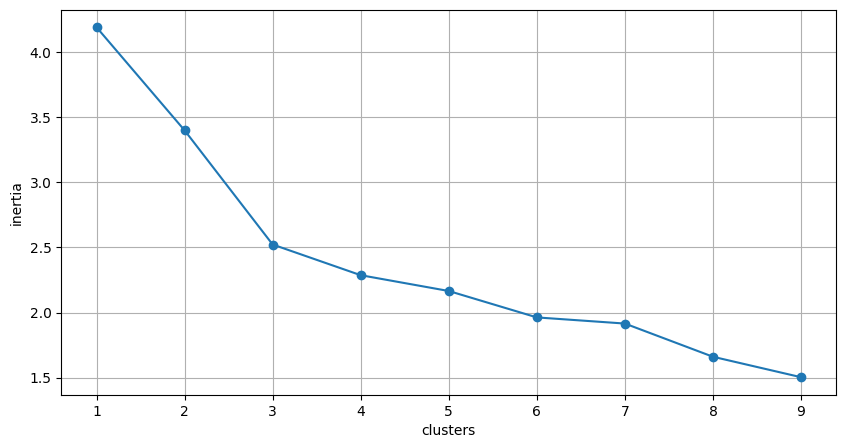

In [7]:
optimize_k(new_df, 10)

In [8]:
kmeans = KMeans(n_clusters=4)

In [9]:
kmeans.fit(new_df)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [12]:
df['cluster'] = kmeans.labels_

In [13]:
df.head()

,Ticker,2025-09-19,2025-09-20,2025-09-21,2025-09-22,2025-09-23,2025-09-24,2025-09-25,2025-09-26,2025-09-27,...,2025-12-10,2025-12-11,2025-12-12,2025-12-13,2025-12-14,2025-12-15,2025-12-16,2025-12-17,kmeans_4,cluster
0,BTC,-0.010214,-0.000248,-0.018376,-0.007503,-0.000689,-0.008251,-0.021607,0.003288,-0.002738,...,-0.024442,0.023155,-0.023089,-0.000984,-0.006993,-0.039389,0.006678,-0.001818,1,1
1,ETH,-0.013839,0.000045,-0.061140,-0.004545,-0.003297,-0.035501,-0.025331,0.024905,-0.002244,...,-0.033591,0.010759,-0.048659,0.007490,0.002530,-0.062654,0.002152,-0.001226,3,3
2,USDT,0.000123,0.000082,-0.000001,0.000090,-0.000418,-0.000082,0.000447,0.000012,-0.000392,...,0.000028,-0.000039,0.000052,0.000076,-0.000087,-0.000177,-0.000127,-0.000016,1,1
3,BNB,0.003355,0.070553,-0.040545,-0.035375,0.026607,-0.017147,-0.057597,0.030952,0.002999,...,-0.022293,0.020194,-0.005762,0.009591,-0.006955,-0.035450,0.002414,0.006434,3,3
4,SOL,-0.024795,0.004487,-0.055152,-0.044322,-0.033041,-0.021131,-0.051037,0.038429,-0.006101,...,-0.056073,0.054510,-0.040583,-0.000070,-0.006098,-0.040736,0.009255,-0.003865,3,3


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(new_df)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2']
)
pca_df['Ticker'] = df['Ticker'].values
pca_df['Cluster'] = df['cluster'].values

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
pca_df.head()

In [ ]:
# Create scatterplot to visualize clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'orange']
cluster_names = [f'Cluster {i}' for i in range(4)]

# Plot each cluster
for i in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    plt.scatter(
        cluster_data['PC1'], 
        cluster_data['PC2'],
        c=colors[i],
        label=cluster_names[i],
        alpha=0.6,
        s=100
    )
    
    # Add ticker labels
    for idx, row in cluster_data.iterrows():
        plt.annotate(
            row['Ticker'],
            (row['PC1'], row['PC2']),
            fontsize=8,
            alpha=0.7
        )

plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-Means Clustering of Cryptocurrencies (PCA Visualization)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Show cluster distribution
print("Cluster Distribution:")
print(df['cluster'].value_counts().sort_index())
print("\nCryptocurrencies by Cluster:")
for i in range(4):
    tickers = df[df['cluster'] == i]['Ticker'].tolist()
    print(f"\nCluster {i} ({len(tickers)} cryptos): {', '.join(tickers)}")